In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk(''):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [6]:
df = pd.read_csv('books.csv', error_bad_lines = False)
df.head(3)

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


In [8]:
df.tail(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [10]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [11]:
df.rename(columns={'  num_pages':'num_pages'}, inplace=True)

In [12]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [13]:
df.shape

(11123, 12)

In [14]:
df.nunique()

bookID                11123
title                 10348
authors                6639
average_rating          209
isbn                  11123
isbn13                11123
language_code            27
num_pages               997
ratings_count          5294
text_reviews_count     1822
publication_date       3679
publisher              2290
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [17]:
df.corr()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.036207,-0.002185,-0.026134,-0.076820,-0.081289
average_rating,-0.036207,1.000000,-0.001965,0.150477,0.038224,0.033663
isbn13,-0.002185,-0.001965,1.000000,-0.009818,0.005494,0.008152
num_pages,-0.026134,0.150477,-0.009818,1.000000,0.034337,0.036977
ratings_count,-0.076820,0.038224,0.005494,0.034337,1.000000,0.865977
text_reviews_count,-0.081289,0.033663,0.008152,0.036977,0.865977,1.000000


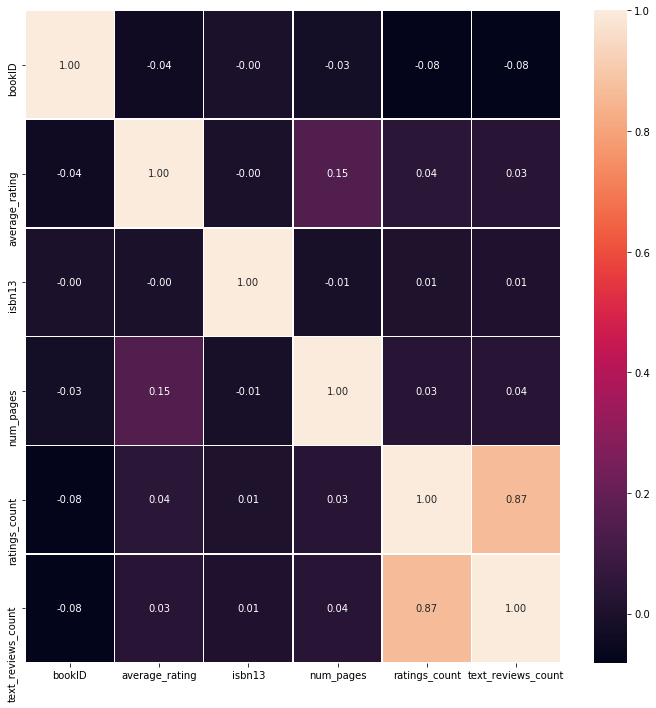

In [18]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.2f', ax=ax)

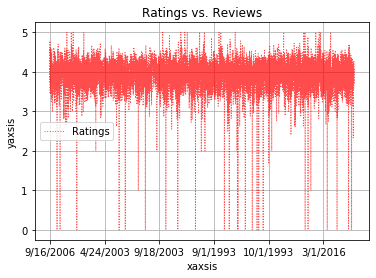

In [19]:
df.plot(x='publication_date',y='average_rating', color='r', label='Ratings', linewidth=1, alpha=0.7, grid=True, linestyle=':')
#df.plot(kind='line', color='g', label='Reviews', linewidth=1, alpha=0.7, grid=True, linestyle=':')
plt.xlabel('xaxsis')
plt.ylabel('yaxsis')
plt.title('Ratings vs. Reviews')
plt.show()

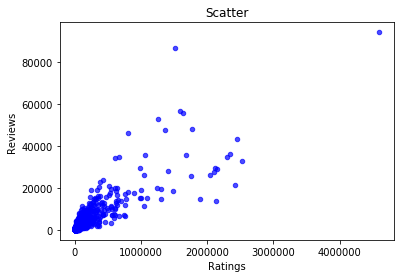

In [20]:
df.plot(kind='scatter', x='ratings_count',y='text_reviews_count', alpha=.7, color='b')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.title('Scatter')
plt.show()

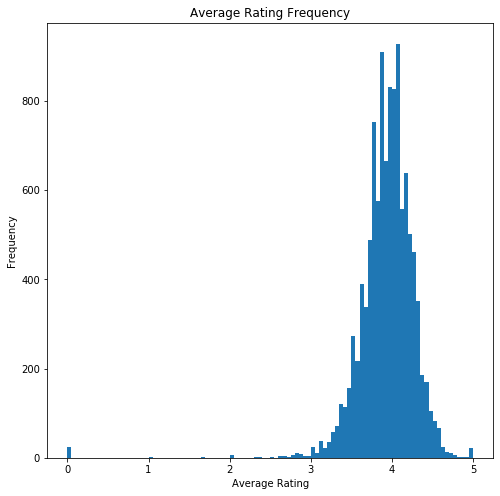

In [21]:
df.average_rating.plot(kind='hist', bins=100, figsize=(8,8))
plt.xlabel('Average Rating')
plt.title('Average Rating Frequency');

In [22]:
x = df['num_pages']>2000
df[x]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
1053,3579,The Complete Anne of Green Gables Boxed Set (A...,L.M. Montgomery,4.43,0553609416,76783609419,eng,2088,98611,1447,10/6/1998,Starfire
5614,20749,Study Bible: NIV,Anonymous,4.70,0310929555,9780310929550,eng,2198,4166,186,10/1/2002,Zondervan Publishing House
6257,23589,The J.R.R. Tolkien Companion and Guide,Christina Scull/Wayne G. Hammond,4.64,0618391134,9780618391134,eng,2264,45,0,11/2/2006,Houghton Mifflin Harcourt
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company
6802,25587,The Second World War,Winston S. Churchill/John Keegan,4.45,039541685X,9780395416853,eng,4736,1493,99,5/9/1986,Mariner Books
6822,25709,Summa Theologica 5 Vols,Thomas Aquinas,4.12,0870610635,9780870610639,eng,3020,2734,84,1/1/1981,Christian Classics
7862,30258,Harrison's Principles of Internal Medicine,Dennis L. Kasper/Dan L. Longo/Stephen L. Hause...,4.35,0071391401,9780071391405,eng,2751,23,4,7/27/2004,McGraw-Hill Medical Publishing
9929,40012,Goodman & Gilman's the Pharmacological Basis o...,Laurence L. Brunton/John S. Lazo/Keith L. Parker,4.29,0071422803,9780071422802,eng,2021,185,8,9/21/2005,McGraw-Hill Professional Publishing


In [23]:
df[np.logical_and(df['average_rating']>4.5, df['ratings_count']>5000)]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,9/25/2012,Ballantine Books
25,36,The Lord of the Rings: Weapons and Warfare,Chris Smith/Christopher Lee/Richard Taylor,4.53,0618391002,9780618391004,eng,218,19822,46,11/5/2003,Houghton Mifflin Harcourt
72,119,The Lord of the Rings: The Art of the Fellowsh...,Gary Russell,4.59,0618212906,9780618212903,eng,192,26153,102,6/12/2002,Houghton Mifflin Harcourt
165,397,The Gettysburg Address,Abraham Lincoln/Michael McCurdy,4.53,0395883970,9780395883976,eng,32,5239,76,2/2/1998,HMH Books for Young Readers
285,866,Fullmetal Alchemist Vol. 9 (Fullmetal Alchemi...,Hiromu Arakawa/Akira Watanabe,4.57,142150460X,9781421504605,eng,192,9013,153,9/19/2006,VIZ Media LLC
286,868,Fullmetal Alchemist Vol. 3 (Fullmetal Alchemi...,Hiromu Arakawa/Akira Watanabe,4.56,1591169259,9781591169253,eng,192,16666,299,9/13/2005,VIZ Media LLC


In [24]:
for index,value in df[['title']][500:505].iterrows():
    print(index," : ",value)

500  :  title    Lysistrata and Other Plays
Name: 500, dtype: object
501  :  title    Acharnians
Name: 501, dtype: object
502  :  title    Clouds
Name: 502, dtype: object
503  :  title    Clouds/Wasps/Peace
Name: 503, dtype: object
504  :  title    Three Plays: The Wasps / The Poet and the Wome...
Name: 504, dtype: object
